# ImageNet 데이터셋 검증 
> MobileNetV1

### import

In [1]:
import os
from datetime import datetime

#### GPU 사용여부# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print(tf.__version__)

2.9.0


#### GPU 사용여부

In [2]:
print("GPU is", "available" if len(tf.config.list_physical_devices('GPU')) > 0 else "NOT AVAILABLE")

GPU is available


# ImageNet load

In [3]:
# Get imagenet labels
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

# Set data_dir to a read-only storage of .tar files
# Set write_dir to a w/r storage
data_dir = "D:/IMAGENET/data_dir/"
write_dir = "D:/IMAGENET/write_dir/"

# Construct a tf.data.Dataset
download_config = tfds.download.DownloadConfig(
                      extract_dir=os.path.join(write_dir, 'extracted'),
                      manual_dir=data_dir
                  )
download_and_prepare_kwargs = {
    'download_dir': os.path.join(write_dir, 'downloaded'),
    'download_config': download_config,
}
ds = tfds.load('imagenet2012_subset', 
               data_dir=os.path.join(write_dir, 'data'),         
               split='validation', 
               shuffle_files=False, 
               download=True, 
               as_supervised=True,
               download_and_prepare_kwargs=download_and_prepare_kwargs)

# MobileNetV1

### Preprocess for MobileNetV1

image shape: (1, 224, 224, 3) label: ['European fire salamander']


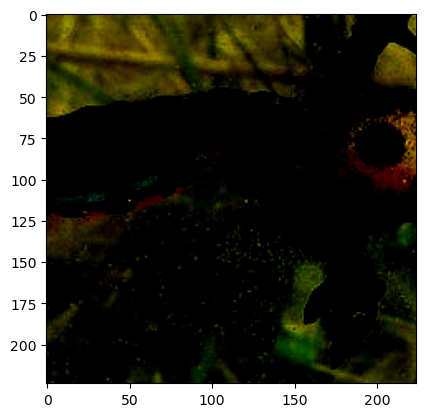

image shape: (1, 224, 224, 3) label: ['mushroom']


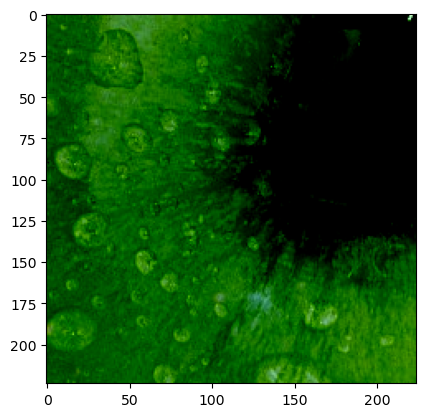

In [4]:
# Preprocess the images
def resize_with_crop_MobileNetV1(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize_with_crop_or_pad(i, 224, 224)
    i = tf.keras.applications.mobilenet.preprocess_input(i)
    return (i, label)

ds_MobileNetV1 = ds.map(resize_with_crop_MobileNetV1)

# Plot a few
ds_MobileNetV1 = ds_MobileNetV1.batch(1).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds_MobileNetV1.take(2):
    image, label = example
    print(f'image shape: {image.shape} label: {imagenet_labels[label]}')
    plt.imshow(tf.squeeze(image, axis=0))
    plt.show()

# Original weight

## Evaluation

In [11]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights="imagenet")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [12]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 283s 6ms/step - loss: 1.8932 - accuracy: 0.5898


In [13]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8931869268417358, 'accuracy': 0.5897600054740906}


# 30bit weight (zero to last 2-bit)

## Evaluation

In [5]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_30bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [6]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>


C:\ProgramData\anaconda3\envs\torch\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50000/50000 [==============================] - 291s 6ms/step - loss: 1.8932 - accuracy: 0.5897


In [7]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8931849002838135, 'accuracy': 0.589739978313446}


# 28bit weight (zero to 4-bit)

## Evaluation

In [8]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_28bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [9]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 282s 6ms/step - loss: 1.8932 - accuracy: 0.5898


In [10]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8931728601455688, 'accuracy': 0.5897799730300903}


# 26bit weight (zero to 6-bit)

## Evaluation

In [14]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_26bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [15]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 280s 6ms/step - loss: 1.8932 - accuracy: 0.5898


In [16]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8931819200515747, 'accuracy': 0.5897799730300903}


# 24bit weight (zero to 8-bit)

## Evaluation

In [17]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_24bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [18]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 284s 6ms/step - loss: 1.8932 - accuracy: 0.5897


In [19]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8931748867034912, 'accuracy': 0.5897200107574463}


# 22bit weight (zero to 10-bit)

## Evaluation

In [20]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_22bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [21]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 282s 6ms/step - loss: 1.8932 - accuracy: 0.5898


In [22]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.893244981765747, 'accuracy': 0.5898000001907349}


# 20bit weight (zero to 12-bit)

## Evaluation

In [23]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_20bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [24]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 280s 6ms/step - loss: 1.8930 - accuracy: 0.5896


In [25]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8929672241210938, 'accuracy': 0.5896400213241577}


# 18bit weight (zero to 14-bit)

## Evaluation

In [26]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_18bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [27]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 280s 6ms/step - loss: 1.8934 - accuracy: 0.5898


In [28]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8934338092803955, 'accuracy': 0.5898399949073792}


# 16bit weight (zero to 16-bit) - half

## Evaluation

In [29]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_16bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [30]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 280s 6ms/step - loss: 1.8946 - accuracy: 0.5880


In [31]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.8946354389190674, 'accuracy': 0.5879999995231628}


# 14bit weight (zero to 18-bit)

## Evaluation

In [32]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_14bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [33]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 276s 6ms/step - loss: 1.9690 - accuracy: 0.5739


In [34]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.9690330028533936, 'accuracy': 0.5738800168037415}


# 12bit weight (zero to 20-bit)

## Evaluation

In [35]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_12bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [36]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 281s 6ms/step - loss: 8.4345 - accuracy: 0.1033


In [37]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 8.434539794921875, 'accuracy': 0.10333999991416931}


# 10bit weight (zero to 22-bit)

## Evaluation

In [38]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_10bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [39]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 277s 6ms/step - loss: 19.3886 - accuracy: 0.0014


In [40]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 19.388626098632812, 'accuracy': 0.0013800000306218863}


# 8bit weight (zero to 24-bit)

## Evaluation

In [41]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_8bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [42]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 282s 6ms/step - loss: 20.4280 - accuracy: 0.0010


In [43]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 20.42795753479004, 'accuracy': 0.001019999966956675}


# 6bit weight (zero to 26-bit)

## Evaluation

In [44]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_6bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [45]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 280s 6ms/step - loss: 436.3950 - accuracy: 0.0010


In [46]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 436.39495849609375, 'accuracy': 0.0010000000474974513}


# 4bit weight (zero to 28-bit)

## Evaluation

In [47]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_4bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [48]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 283s 6ms/step - loss: 21482.2324 - accuracy: 0.0010


In [49]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 21482.232421875, 'accuracy': 0.0010000000474974513}


# 2bit weight (zero to 30-bit)

## Evaluation

In [50]:
model_MobileNetV1 = tf.keras.applications.mobilenet.MobileNet(include_top=True,alpha=0.75,
                                                     weights=r"C:\Users\김정헌\OneDrive\바탕 화면\slim\rand_mobileV1\mask_mobilenet_7_5_224_tf_2bit.h5")
model_MobileNetV1.trainable = False
model_MobileNetV1.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         metrics=['accuracy'])
model_MobileNetV1.summary()

Model: "mobilenet_0.75_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 24)      648       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 24)     96        
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 24)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 24)     216       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 24)     96        
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 384)      3456      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 384)      1536      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 384)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 384)       147456    
                                                                 
 conv_pw_9

In [51]:
# decode_predictions_InceptionV3 = tf.keras.applications.xception.decode_predictions

print("<Evaluate model>")
result_MobileNetV1 = model_MobileNetV1.evaluate(ds_MobileNetV1)

<Evaluate model>
50000/50000 [==============================] - 282s 6ms/step - loss: 1996186019244428184518656.0000 - accuracy: 0.0010


In [52]:
print(dict(zip(model_MobileNetV1.metrics_names, result_MobileNetV1)))

{'loss': 1.9961860192444282e+24, 'accuracy': 0.0010000000474974513}


---
---
---

# Visualization
> top-1 accuracy

In [1]:
accuracy_decend = [0.5897600054740906, 0.589739978313446, 0.5897799730300903, 0.5897799730300903, 0.5897200107574463, 0.5898000001907349, 0.5896400213241577, 0.5898399949073792, 0.5879999995231628, 0.5738800168037415, 0.10333999991416931, 0.0013800000306218863, 0.001019999966956675, 0.0010000000474974513, 0.0010000000474974513, 0.0010000000474974513]
accuracy_decend

[0.5897600054740906,
 0.589739978313446,
 0.5897799730300903,
 0.5897799730300903,
 0.5897200107574463,
 0.5898000001907349,
 0.5896400213241577,
 0.5898399949073792,
 0.5879999995231628,
 0.5738800168037415,
 0.10333999991416931,
 0.0013800000306218863,
 0.001019999966956675,
 0.0010000000474974513,
 0.0010000000474974513,
 0.0010000000474974513]

In [2]:
bit_accend = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]
bit_decend = bit_accend[::-1]

In [3]:
bit_decend

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]

### 전체적인 시각화

| bit (assumption) | accuracy |
| --- | --- |
| 32 | 0.5897600054740906 |
| 30 | 0.589739978313446 |
| 28 | 0.5897799730300903 |
| 26 | 0.5897799730300903 |
| 24 | 0.5897200107574463 |
| 22 | 0.5898000001907349 |
| 20 | 0.5896400213241577 |
| 18 | 0.5898399949073792 |
| 16 | 0.5879999995231628 |
| 14 | 0.5738800168037415 |
| 12 | 0.10333999991416931 |
| 10 | 0.0013800000306218863 |
| 8 | 0.001019999966956675 |
| 6 | 0.0010000000474974513 |
| 4 | 0.0010000000474974513 |
| 2 | 0.0010000000474974513 |

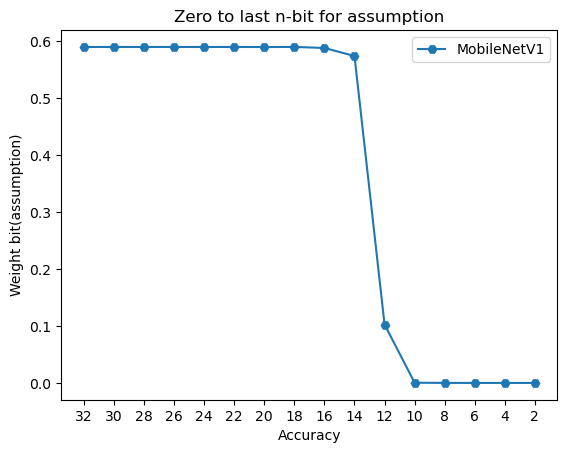

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend, accuracy_decend, marker='H')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption')
plt.legend(['MobileNetV1'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend)

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 32~12비트까지 시각화

In [5]:
bit_decend[:11]

[32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12]

In [6]:
len(accuracy_decend[:11])

11

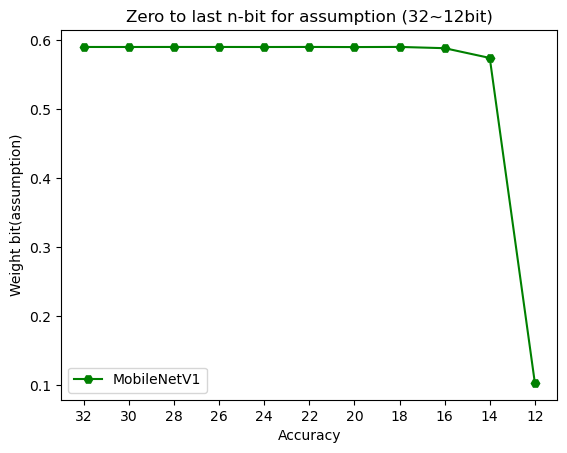

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[:11], accuracy_decend[:11], marker='H', color='green')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (32~12bit)')
plt.legend(['MobileNetV1'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[:11])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()

## 12~2비트까지 시각화

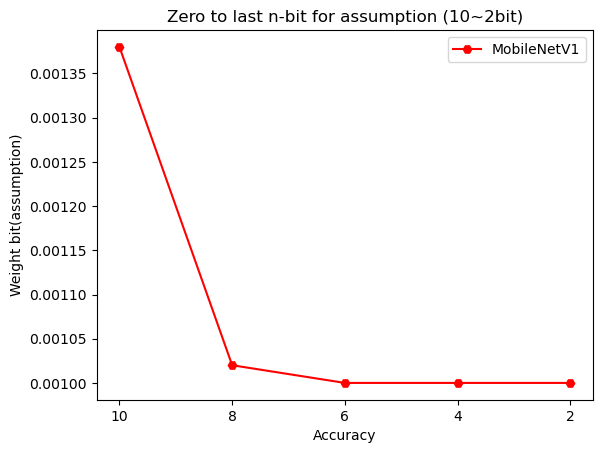

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.plot(bit_decend[11:], accuracy_decend[11:], marker='H', color='red')
plt.xlabel('Accuracy')
plt.ylabel('Weight bit(assumption)')
plt.title('Zero to last n-bit for assumption (10~2bit)')
plt.legend(['MobileNetV1'])

# Set the x-ticks to show all the values in the bit_decend list
plt.xticks(bit_decend[11:])

# Invert the x-axis values
plt.gca().invert_xaxis()

plt.show()